In [1]:
# make data frame from csv file
import pandas as pd
df = pd.read_csv('emails.csv', encoding="ISO-8859-1")

In [2]:
df.tail()

,text,spam
5723,Subject: re : research and development charges...,0
5724,"Subject: re : receipts from visit jim , than...",0
5725,Subject: re : enron case study update wow ! a...,0
5726,"Subject: re : interest david , please , call...",0
5727,Subject: news : aurora 5 . 2 update aurora ve...,0


In [3]:
# divide data into text and its label
from sklearn.model_selection import train_test_split
text = df['text'].values
label = df['spam'].values
# divide data into data train and data test
text_train, text_test, label_train, label_test = train_test_split(text, label, test_size=0.2)

In [4]:
# show sample of the email
print(text_train[0])
print('\n')
print(text_test[0])

Subject: livelink access  - - - - - - - - - - - - - - - - - - - - - - forwarded by stinson gibner / hou / ect on 04 / 11 / 2001  01 : 13 pm - - - - - - - - - - - - - - - - - - - - - - - - - - -  enron technology  from : moyez lallani @ enron 01 / 16 / 2001 10 : 46 am  to : stinson gibner / hou / ect @ ect , vasant shanbhogue / hou / ect @ ect  cc :  subject : livelink access  gentlemen ,  i have created a folder called research projects folder in the livelink test  instance . the url to the test instance is  to log in , use your nt login id as your userid and password ( all lowercase ) .  you will find the folder on the enterprise workspace . please call me should  you require further assistance .  moyez lallani  x 5 - 3683


Subject: my resume  hi vince ,  i spoke with ray again , and he seems to have the background necessary to  work with the insurance group here .  he is not an actuary , but he can work with data . would you mind calling him  on the phone sometime next week ?  pleas

In [5]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
# convert each word into certain number (tokenization) 
tokenizer = Tokenizer(num_words=10000, oov_token='*', 
                      filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n', lower=True,
                      split=' ', char_level=False)
tokenizer.fit_on_texts(text_train) 
tokenizer.fit_on_texts(text_test)
# convert each text into sequence
sequence_train = tokenizer.texts_to_sequences(text_train)
sequence_test = tokenizer.texts_to_sequences(text_test)

In [6]:
# show sample of the token
print(tokenizer.texts_to_sequences(text_train[0]))
print('\n')
print(tokenizer.texts_to_sequences(text_test[0]))

[[30], [414], [314], [48], [72], [292], [102], [], [], [339], [9], [526], [72], [339], [9], [829], [584], [], [6], [292], [292], [72], [30], [30], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [780], [390], [367], [470], [6], [367], [184], [72], [184], [], [314], [1321], [], [30], [102], [9], [829], [30], [390], [829], [], [382], [9], [314], [829], [72], [367], [], [], [], [758], [390], [414], [], [], [], [72], [292], [102], [], [390], [829], [], [89], [107], [], [], [], [51], [51], [], [], [], [54], [89], [89], [51], [], [], [89], [51], [], [], [], [51], [65], [], [203], [125], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [72], [829], [367], [390], [829], [], [102], [72], [

In [7]:
# implement padding to the text
padded_train = pad_sequences(sequence_train,
                            padding='post',
                            maxlen=50,
                            truncating='post') 
padded_test = pad_sequences(sequence_test,
                            padding='post',
                            maxlen=50,
                            truncating='post')

In [8]:
# show the sample of the padded text
print(padded_train[0])
print('\n')
print(padded_test[0])

[  16 4320  266  123   33  177  300   32   14   12  121   99   53  100
  379   52   11  435   27 4666 5252   11  100  268   53   60  662   37
    3  177  300   32   14   14  442  663   32   14   14   47   16 4320
  266 3554    9   25 1439    6 4006  973]


[  16   49  229  238   23    9 1134   21 3012  276    4   71  876    3
   25    2 1141  861    3  120   21    2  668   67   96   71   13   41
   50    1   77   71   45  120   21  197   42    7  930 2440  178   12
    2  194 1920  156  148   38   84   43]


In [9]:
# make machine learning model
import tensorflow as tf
from tensorflow.keras import regularizers
model = tf.keras.Sequential([
  # implement embedding
  tf.keras.layers.Embedding(10000, 64), 
  # use 2 layer of bidirectional LSTM
  tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64,  return_sequences=True)),
  tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Dense(512, activation='relu',
                        kernel_regularizer=regularizers.l2(0.00001)),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Dense(512, activation='relu',
                        kernel_regularizer=regularizers.l2(0.00001)),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Dense(1, activation='sigmoid')
])
# implement dropout and regularizers function

In [10]:
# use adam optimizer and binary crossentropy loss function
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [11]:
# train the model
num_epochs = 20
history = model.fit(padded_train, label_train, epochs=num_epochs, batch_size=512,
                    validation_data=(padded_test, label_test), verbose=2)

Epoch 1/20
9/9 - 17s - 2s/step - accuracy: 0.7274 - loss: 0.6087 - val_accuracy: 0.7653 - val_loss: 0.4739
Epoch 2/20
9/9 - 6s - 613ms/step - accuracy: 0.7601 - loss: 0.3820 - val_accuracy: 0.7653 - val_loss: 0.2523
Epoch 3/20
9/9 - 5s - 599ms/step - accuracy: 0.8566 - loss: 0.2115 - val_accuracy: 0.9625 - val_loss: 0.1686
Epoch 4/20
9/9 - 6s - 619ms/step - accuracy: 0.9758 - loss: 0.0965 - val_accuracy: 0.9703 - val_loss: 0.0967
Epoch 5/20
9/9 - 5s - 602ms/step - accuracy: 0.9900 - loss: 0.0417 - val_accuracy: 0.9738 - val_loss: 0.0979
Epoch 6/20
9/9 - 6s - 644ms/step - accuracy: 0.9950 - loss: 0.0250 - val_accuracy: 0.9825 - val_loss: 0.0626
Epoch 7/20
9/9 - 6s - 641ms/step - accuracy: 0.9980 - loss: 0.0142 - val_accuracy: 0.9834 - val_loss: 0.0515
Epoch 8/20
9/9 - 6s - 638ms/step - accuracy: 0.9993 - loss: 0.0084 - val_accuracy: 0.9817 - val_loss: 0.0563
Epoch 9/20
9/9 - 6s - 618ms/step - accuracy: 0.9996 - loss: 0.0072 - val_accuracy: 0.9791 - val_loss: 0.0914
Epoch 10/20
9/9 - 6s 

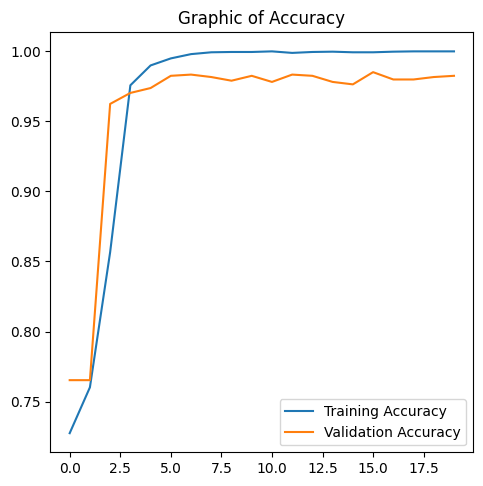

In [12]:
# show graphic plot of accuracy
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.figure(figsize=(12, 12))
plt.subplot(2, 2, 3)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='best')
plt.title('Graphic of Accuracy')
plt.show()

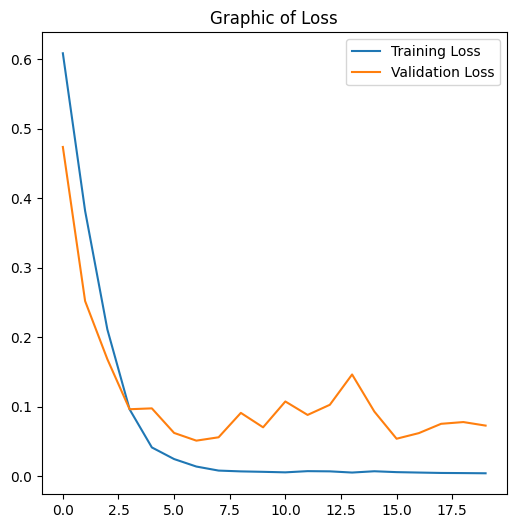

In [13]:
# show graphic plot of loss
loss=history.history['loss']
val_loss=history.history['val_loss']

plt.figure(figsize=(6, 6))
plt.subplot(1, 1, 1)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='best')
plt.title('Graphic of Loss')
plt.show()

In [14]:
# test the model using data test
y_predict = [1 if o>0.5 else 0 for o in model.predict(padded_test)]

36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step


In [15]:
# find F1-score for performance metrics
from sklearn.metrics import confusion_matrix,f1_score, precision_score,recall_score
cf_matrix = confusion_matrix(label_test, y_predict)
tn, fp, fn, tp = confusion_matrix(label_test,y_predict).ravel()
print("Precision: {:.2f}%".format(100 * precision_score(label_test, y_predict)))
print("Recall: {:.2f}%".format(100 * recall_score(label_test, y_predict)))
print("F1 Score: {:.2f}%".format(100 * f1_score(label_test,y_predict)))

Precision: 95.27%
Recall: 97.40%
F1 Score: 96.32%


[Text(0, 0.5, 'Not Spam'), Text(0, 1.5, 'Spam')]

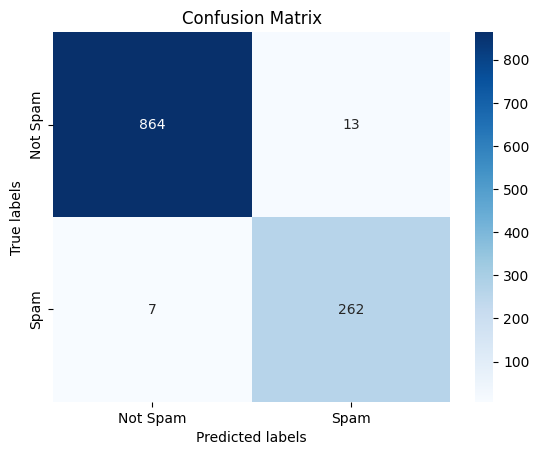

In [16]:
# visualize result
import seaborn as sns
import matplotlib.pyplot as plt
ax= plt.subplot()
# annot=True to annotate cells
sns.heatmap(cf_matrix, annot=True, ax = ax,cmap='Blues',fmt='')
# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['Not Spam', 'Spam']); ax.yaxis.set_ticklabels(['Not Spam', 'Spam'])

In [17]:
# predict spam email from my inbox using trained model
spam_text = ["""
When you toss a pebble in a pond, outward ripples result. Make that pebble a stone, and the ripples are larger, stronger and extend further. If the ripples are the results of your organization, your frontline leaders are stones, not pebbles.
 
Everyone will say that frontline leaders are important to the success of their organizations. But most don’t know just how true that is.
 
If you want your organization to be more effective, productive, and resilient you need to think more about how you engage, support, and invest in your Frontline leaders.
 
Join Kevin Eikenberry, a leading authority on leadership and leadership development for this informative, engaging, interactive, and thought-provoking webinar to better understand the leverage your frontline leaders have on nearly all aspects of organizational success. More importantly you will leave with an action plan for how you can create more of the results you desire.
 
If you are looking to jumpstart the development of your leaders, or are stymied by your past efforts, this will be worth your time.
 
By the end of this engaging and dynamic session, you will be able to:
Describe the underlying reasons why frontline leaders are such a leverage point for organizational success.
How to create a learning culture for your frontline leaders
Identify approaches to developing frontline leaders – and determine the best for your situations
Build an action plan to improve the skills and results of your frontline leaders
The future is bright for organizations with prepared, skilled, and confident frontline leaders. Join us to think about and build a plan for helping your frontline leaders drive our organizational success.
 
Learn more and register here!
"""]
tokenizer.fit_on_texts(spam_text)
spam_sequence = tokenizer.texts_to_sequences(spam_text)
spam_padded = pad_sequences(spam_sequence,
                            padding='post',
                            maxlen=50,
                            truncating='post')
prediction = model.predict(spam_padded)
if prediction > 0.6:
    print("The email is spam")
else:
    print("The email is not spam")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
The email is spam
